In [11]:
# radar_sample.ipynb - crm 2019
# credentialize and gather track audio features for all public playlists of users listed in users.txt
# by requesting JSON or loading from today's .npz directory
# remove loudness and tempo, calculate means and save plot as .png
import sys
import os
import datetime
import logging

import numpy as np
import matplotlib.pyplot as plt

# add pkg path
sys.path.insert(0, os.path.dirname(os.path.abspath('../polka/polka')))
import core
from radaraxes import radar_factory

logging.basicConfig(level=os.environ.get("LOGLEVEL", "INFO"))
logger = logging.getLogger("ipynb_rs")

In [19]:
date_str = datetime.datetime.now().strftime("%Y%m%d")
data_dir = "dat/public"
npz_dir = os.path.join(data_dir, date_str + "/")
list_path = os.path.join(data_dir, "users.txt")
img_path = os.path.join(npz_dir, 'radar.png')

In [20]:
# client credentials for public data
sp = core.do_auth()

INFO:core:Client credentialized!


In [21]:
# fetch_user_list(sp, _input_username_list, output_data_dir)
user_list = core.fetch_user_list(sp, list_path, npz_dir)

INFO:core:Fetching user chadrm9
INFO:core:Retrieved 1058 tracks in 60 public playlists
INFO:User:Stored chadrm9 to dat/public/20190826/chadrm9.npz
INFO:core:Fetching user 1296225797
INFO:core:Retrieved 233 tracks in 4 public playlists
INFO:User:Stored 1296225797 to dat/public/20190826/1296225797.npz
INFO:core:Fetching user x4s7phb9n8c8frmj2d7hfrrce
INFO:core:Retrieved 477 tracks in 14 public playlists
INFO:User:Stored x4s7phb9n8c8frmj2d7hfrrce to dat/public/20190826/x4s7phb9n8c8frmj2d7hfrrce.npz
INFO:core:Fetching user dudja
INFO:core:Retrieved 726 tracks in 10 public playlists
INFO:User:Stored dudja to dat/public/20190826/dudja.npz


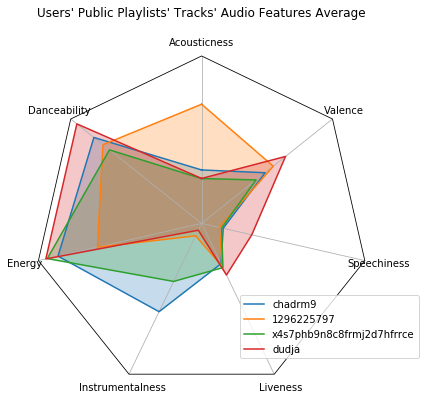

In [22]:
# compute and stack float averages for feature set of each user
np_af_mean_flt = np.vstack([np.mean(user.np_af_flt, axis=0) for user in user_list])

# drop loudness and tempo
np_af_mean_flt = np.delete(np_af_mean_flt, [5, 8], 1)

# build plots
N = len(np_af_mean_flt[0])
theta = radar_factory(N, frame='polygon')

spoke_labels = ['Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                'Liveness', 'Speechiness', 'Valence']
title = "Users' Public Playlists' Tracks' Audio Features Average"
case_data = np_af_mean_flt

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

ax.set_rgrids([])
ax.set_title(title,  position=(0.5, 1.1), ha='center')

for d in case_data:
    line = ax.plot(theta, d)
    ax.fill(theta, d,  alpha=0.25)
ax.set_varlabels(spoke_labels)

# username legend tuple
usernames = [''.join(user.username) for user in user_list]
plt.gca().legend(usernames, bbox_to_anchor=(0.6, 0.3))

# plot to file
plt.savefig(img_path)